# Implementing the Gradient Descent Algorithm
In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def trazar_puntos(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def mostrar(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)


         0         1  2
0  0.78051 -0.063669  1
1  0.28774  0.291390  1
2  0.40714  0.178780  1
3  0.29230  0.421700  1
4  0.50922  0.352560  1


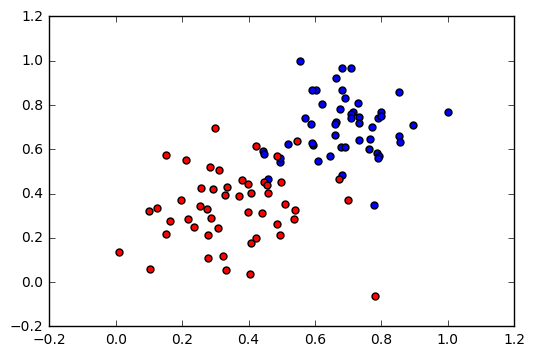

In [3]:
## Reading and plotting the data

data = pd.read_csv('/Users/EGM/Desktop/Data Science/DeepLearning/data.csv', header=None)
print(data.head())
X = np.array(data[[0,1]])
y = np.array(data[2])
trazar_puntos(X,y)
plt.show()

## TODO: Implementing the basic functions

## Para hacer: Implementar funciones básicas

Implement the following formulas, as explained in the text.
Implementar las siguientes formulas:

- Sigmoid activation function
- Función de activación Sigmoid

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- salida (prediction) formula
- Fórmula de Salida (predicción)

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function
- Fórmula de Error

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights
- Fórmula que actualiza los pesos

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [7]:
# Implement the following functions
# Implementar las siguientes funciones

# Activation (sigmoid) function
# Función de axctivación Sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# salida (prediction) formula
#Fórmula de Salida (predicción)

def formula_salida(caracteristicas, pesos, prejuicios):
    return sigmoid (np.dot(caracteristicas, pesos) + prejuicios)

# Error (log-perdida) formula
# Fórmula de error (log-perdida)

def formula_error(y, salida):
    return -y*np.log(salida)-(1-y)* np.log(1 - salida)

# Gradient descent step
# Paso Gradient Descent

def actualizar_pesos(x, y, pesos, prejuicios, velocidadaprendizaje):
    salida = formula_salida(x, pesos, prejuicios)
    d_error = y - salida
    pesos += velocidadaprendizaje * d_error
    prejuicios += velocidadaprendizaje * d_error
    return pesos, prejuicios

## Training function
## Entrenar la función
Esta función nos ayudara a iterar el algoritmo gradient descent a travez de todos los datos por un cierto numero de epochs. Tambien trazara los datos y algúnos de las líneas de límites las cuales se obtienen mientra se ejecuta el algoritmo.

This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [9]:
np.random.seed(44)

epochs = 100
velocidadaprendizaje = 0.01

def entrenar(caracteristicas, targets, epochs, velocidadaprendizaje, graph_lines=False):
    
    errores = []
    n_records, n_caracteristicas = caracteristicas.shape
    last_perdida = None
    pesos = np.random.normal(scale=1 / n_caracteristicas**.5, size=n_caracteristicas)
    prejuicios = 0
    for e in range(epochs):
        del_w = np.zeros(pesos.shape)
        for x, y in zip(caracteristicas, targets):
            salida = formula_salida(x, pesos, prejuicios)
            error = formula_error(y, salida)
            pesos, prejuicios = actualizar_pesos(x, y, pesos, prejuicios, velocidadaprendizaje)
        
        # Printing out the log-perdida error on the training set
        # Imprimir el error log-perdida del grupo de entrenamiento
        
        salida = formula_salida(caracteristicas, pesos, prejuicios)
        perdida = np.mean(formula_error(targets, salida))
        errores.append(perdida)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_perdida and last_perdida < perdida:
                print("Pérdida en Entrenamiento: ", perdida, "  WARNING - Pérdida Incrementando")
            else:
                print("Pérdida en Entrenamiento: ", perdida)
            last_perdida = perdida
            predicciones = salida > 0.5
            exactitud = np.mean(predicciones == targets)
            print("exactitud: ", exactitud)
        if graph_lines and e % (epochs / 100) == 0:
            mostrar(-pesos[0]/pesos[1], -prejuicios/pesos[1])
            

    # Plotting the solution boundary
    plt.title("Límites de Solución")
    mostrar(-pesos[0]/pesos[1], -prejuicios/pesos[1], 'black')

    # Plotting the data
    trazar_puntos(caracteristicas, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Número de epochs')
    plt.ylabel('Error')
    plt.plot(errores)
    plt.show()

Time to train the algorithm!
When we run the function, we'll obtain the following:

10 updates with the current training perdida and exactitud A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs. A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Pérdida en Entrenamiento:  0.7202205782879945
exactitud:  0.39

========== Epoch 10 ==========
Pérdida en Entrenamiento:  0.7041309694287553
exactitud:  0.51

========== Epoch 20 ==========
Pérdida en Entrenamiento:  0.7040933860128257
exactitud:  0.51

========== Epoch 30 ==========
Pérdida en Entrenamiento:  0.7040931485943637
exactitud:  0.51

========== Epoch 40 ==========
Pérdida en Entrenamiento:  0.7040931470778204
exactitud:  0.51

========== Epoch 50 ==========
Pérdida en Entrenamiento:  0.7040931470681326
exactitud:  0.51

========== Epoch 60 ==========
Pérdida en Entrenamiento:  0.7040931470680707
exactitud:  0.51

========== Epoch 70 ==========
Pérdida en Entrenamiento:  0.7040931470680707
exactitud:  0.51

========== Epoch 80 ==========
Pérdida en Entrenamiento:  0.7040931470680709   WARNING - Pérdida Incrementando
exactitud:  0.51

========== Epoch 90 ==========
Pérdida en Entrenamiento:  0.7040931470680711   WARNING - Pérdida Incrementando


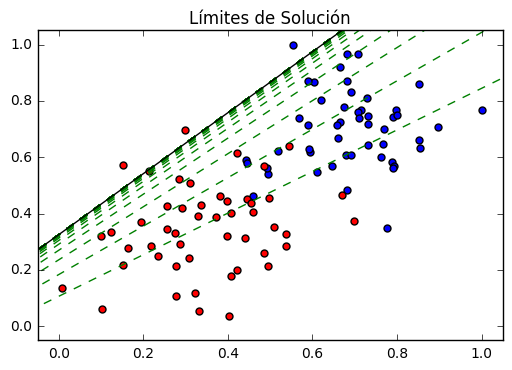

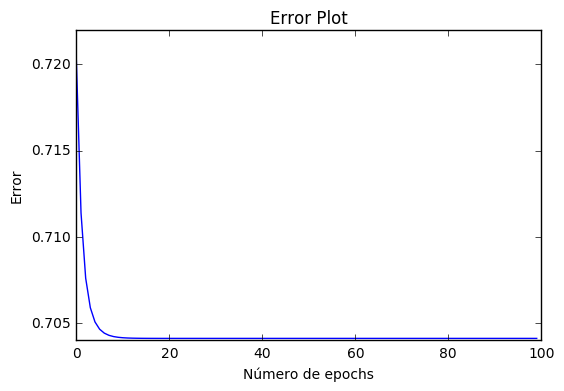

In [10]:
entrenar(X, y, epochs, velocidadaprendizaje, True)